In [1]:
import tensorflow as tf
import numpy as np

import warnings
mnist = tf.keras.datasets.mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

# http://yann.lecun.com/exdb/mnist/
import matplotlib.pyplot as plt

# plt.imshow(X_train[0])
# plt.imshow(X_train[0], cmap=plt.cm.binary_r)
# plt.show()

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=4)

val_loss, val_acc = model.evaluate(X_test, y_test)

model.save('mnist_predictor.model')
new_model = tf.keras.models.load_model('mnist_predictor.model')
predictions = new_model.predict(X_test)
print(np.argmax(predictions[0]))

11493376/11490434 [==============================] - 1s 0us/step


W0801 11:13:46.167664 4456330688 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/4
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2676 - acc: 0.9219
Epoch 2/4
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1099 - acc: 0.9664
Epoch 3/4
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0760 - acc: 0.9760
Epoch 4/4
10000/10000 [==============================] - 1s 58us/sample - loss: 0.0985 - acc: 0.9709


W0801 11:14:03.999333 4456330688 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 11:14:04.001687 4456330688 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0801 11:14:04.198508 4456330688 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


7


In [2]:
for i in range(10):
    print(np.argmax(predictions[i]))

7
2
1
0
4
1
4
9
5
9


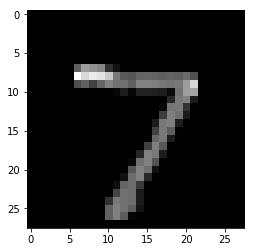

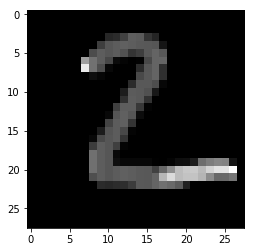

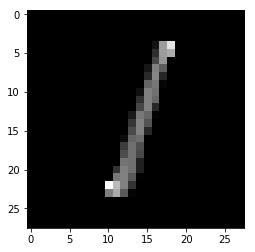

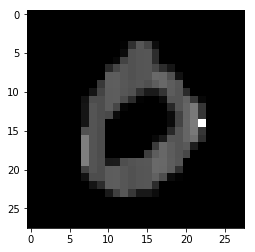

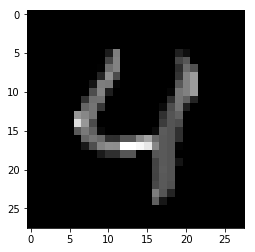

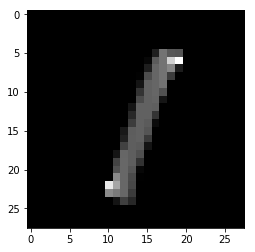

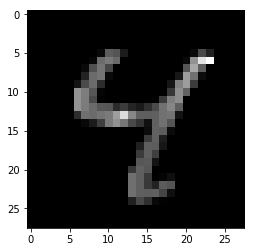

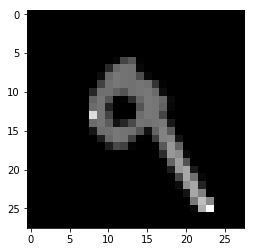

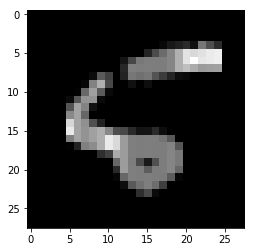

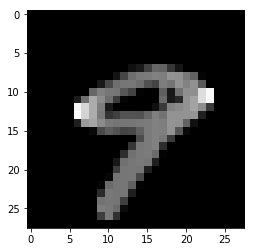

In [5]:
for i in range(10):
    plt.imshow(X_test[i])
    plt.imshow(X_test[i], cmap=plt.cm.binary_r)
    plt.show()